In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# parse routing_weights.tsv
l1_weights = []
with open("/root/expert_activations/routing_weights.tsv", "r") as f:
    _ = f.readline()
    for line in f:
        _, layer_id, expert_weights = line.split("\t")
        expert_weights = [float(x) for x in expert_weights.split(",")]
        layer_id = int(layer_id)
        if layer_id == 1:
            l1_weights.append(expert_weights)

In [3]:
l1_df = pd.DataFrame(l1_weights)

Text(0.5, 1.0, 'Layer 1 Expert Weight Distribution')

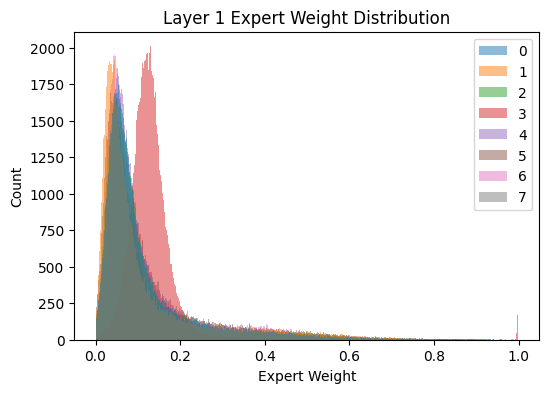

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(l1_df, ax=ax, edgecolor="none")
ax.set_xlabel("Expert Weight")
ax.set_ylabel("Count")
ax.set_title("Layer 1 Expert Weight Distribution")

In [6]:
fig.savefig("l1_all_expert_weight_distribution.pdf", bbox_inches="tight")

In [14]:
# separate tokens that are routed to expert 3
selected_experts = []
for weights in l1_weights:
    argmax = np.argsort(np.array(weights))
    selected_experts.append((argmax[-1], argmax[-2]))

In [29]:
l1_routed_to_experts = {}
for i in range(len(l1_weights)):
    for expert_id in range(8):
        if expert_id in selected_experts[i]:
            if expert_id not in l1_routed_to_experts:
                l1_routed_to_experts[expert_id] = []
            l1_routed_to_experts[expert_id].append(l1_weights[i])

In [32]:
dfs = []
for expert_id in range(8):
    weights = l1_routed_to_experts[expert_id]
    df = pd.DataFrame(weights)
    dfs.append(df)

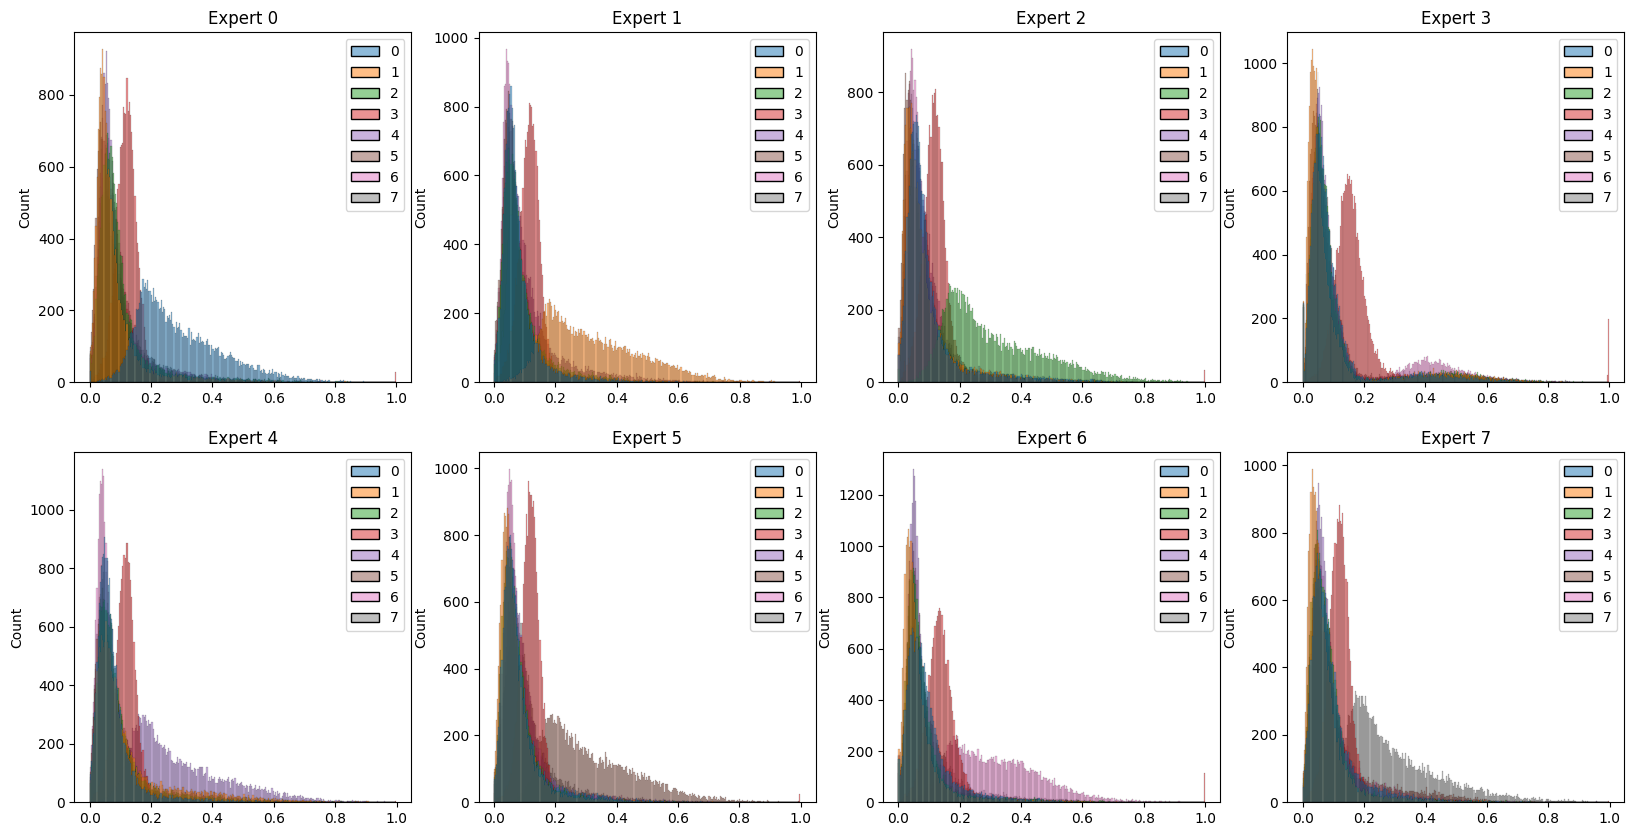

In [33]:
# plot the distribu
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, df in enumerate(dfs):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=df, ax=ax)
    ax.set_title(f"Expert {i}")

In [35]:
fig.savefig("l1_expert_routing.pdf", bbox_inches="tight")

In [36]:
# max score per expert
max_scores = [0] * 8
for i in range(len(l1_weights)):
    for expert_id in range(8):
        max_scores[expert_id] = max(l1_weights[i][expert_id], max_scores[expert_id])